# Lab-9: Callbacks: NNs, checkpoints, early stopping



Import Boston dataset.

In [1]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data()
print(X_train.shape)
print(X_test.shape)

2021-10-21 12:59:21.937042: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-21 12:59:21.937068: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


65536/57026 [==================================] - 0s 1us/step
(404, 13)
(102, 13)


Create a simple Dense network with 2-3 Dense layers. Compile it

In [43]:
from tensorflow.keras.layers import Input, Dense

activation = "relu"
inlayer = Input(shape=(13, 1))
x = Dense(32, activation=activation)(inlayer)
x = Dense(64, activation=activation)(x)
x = Dense(32, activation=activation)(x)
x = Dense(1, activation=activation)(x)

In [44]:
from tensorflow.keras import Model

model = Model(inputs=inlayer, outputs=x)
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 13, 1)]           0         
_________________________________________________________________
dense_36 (Dense)             (None, 13, 32)            64        
_________________________________________________________________
dense_37 (Dense)             (None, 13, 64)            2112      
_________________________________________________________________
dense_38 (Dense)             (None, 13, 32)            2080      
_________________________________________________________________
dense_39 (Dense)             (None, 13, 1)             33        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [45]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=60)

Epoch 1/60
13/13 [==============================] - 1s 16ms/step - loss: 502.4690 - val_loss: 528.2779
Epoch 2/60
13/13 [==============================] - 0s 5ms/step - loss: 492.0924 - val_loss: 519.1943
Epoch 3/60
13/13 [==============================] - 0s 5ms/step - loss: 489.3951 - val_loss: 514.5741
Epoch 4/60
13/13 [==============================] - 0s 7ms/step - loss: 486.9517 - val_loss: 511.1699
Epoch 5/60
13/13 [==============================] - 0s 4ms/step - loss: 482.7680 - val_loss: 506.9005
Epoch 6/60
13/13 [==============================] - 0s 4ms/step - loss: 475.5706 - val_loss: 501.0363
Epoch 7/60
13/13 [==============================] - 0s 7ms/step - loss: 467.6390 - val_loss: 487.6684
Epoch 

In [78]:
from matplotlib import pyplot as plt

def plot(history) -> None:
    plt.plot(list(range(len(history.history["loss"]))), history.history["loss"], label="loss")
    plt.plot(list(range(len(history.history["val_loss"]))), history.history["val_loss"], label="val_loss")
    plt.xlabel("x")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

In [ ]:
plot(history)

Add BatchNormalization before each layer.

In [74]:
from keras.layers import BatchNormalization

inlayer = Input(shape=(13, 1))

x = BatchNormalization()(inlayer)
x = Dense(256, activation=activation)(x)

x = BatchNormalization()(x)
x = Dense(256, activation=activation)(x)

x = BatchNormalization()(x)
x = Dense(1, activation=activation)(x)

model = Model(inputs=inlayer, outputs=x)
model.compile(loss="mse", optimizer="adam")
model.summary()

Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 13, 1)]           0         
_________________________________________________________________
batch_normalization_39 (Batc (None, 13, 1)             4         
_________________________________________________________________
dense_67 (Dense)             (None, 13, 256)           512       
_________________________________________________________________
batch_normalization_40 (Batc (None, 13, 256)           1024      
_________________________________________________________________
dense_68 (Dense)             (None, 13, 256)           65792     
_________________________________________________________________
batch_normalization_41 (Batc (None, 13, 256)           1024      
_________________________________________________________________
dense_69 (Dense)             (None, 13, 1)             257

Train. Compare the resulting loss. You can plot both losses for visualization

In [75]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

13/13 [==============================] - 0s 7ms/step - loss: 82.1127 - val_loss: 80.2268
Epoch 74/100
13/13 [==============================] - 0s 7ms/step - loss: 82.1685 - val_loss: 80.7321
Epoch 75/100
13/13 [==============================] - 0s 7ms/step - loss: 82.3182 - val_loss: 81.1038
Epoch 76/100
13/13 [==============================] - 0s 8ms/step - loss: 82.3428 - val_loss: 80.4062
Epoch 77/100
13/13 [==============================] - 0s 7ms/step - loss: 82.2877 - val_loss: 80.8654
Epoch 78/100
13/13 [==============================] - 0s 8ms/step - loss: 81.7971 - val

Plot validation loss and train loss on one plot (history.history['loss'], history.history['val_loss'])

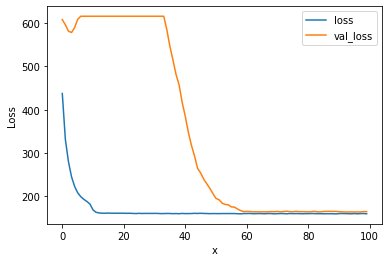

In [76]:
plot(history)

Saving checkpoints allow you to dump your model from epoch to epoch for future use.
Create callback for making model checkpoints. Make it to save version with smallest val_loss.
Train NN with callback
HINT tf.keras.callbacks.ModelCheckpoint

In [64]:
filepath = "chkpt/"
my_callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath=filepath + "model.{epoch:02d}-{val_loss:.2f}.h5"),
]
model = Model(inputs=inlayer, outputs=x)
model.compile(loss="mse", optimizer="adam")
model.summary()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, callbacks=my_callbacks)
plot(history)

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 13, 1)]           0         
_________________________________________________________________
batch_normalization_28 (Batc (None, 13, 1)             4         
_________________________________________________________________
dense_56 (Dense)             (None, 13, 32)            64        
_________________________________________________________________
batch_normalization_29 (Batc (None, 13, 32)            128       
_________________________________________________________________
dense_57 (Dense)             (None, 13, 64)            2112      
_________________________________________________________________
batch_normalization_30 (Batc (None, 13, 64)            256       
_________________________________________________________________
dense_58 (Dense)             (None, 13, 32)            208

Early stopping allow you to stop training process if 'SMTH'. For example overfitting or small loss change.
Create callback for early stopping. Make it to stop when val_loss does not go beyond last minimum value for 3 epochs.
Train NN with callback
HINT tf.keras.callbacks.EarlyStopping

Model: "model_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 13, 1)]           0         
_________________________________________________________________
batch_normalization_39 (Batc (None, 13, 1)             4         
_________________________________________________________________
dense_67 (Dense)             (None, 13, 256)           512       
_________________________________________________________________
batch_normalization_40 (Batc (None, 13, 256)           1024      
_________________________________________________________________
dense_68 (Dense)             (None, 13, 256)           65792     
_________________________________________________________________
batch_normalization_41 (Batc (None, 13, 256)           1024      
_________________________________________________________________
dense_69 (Dense)             (None, 13, 1)             257

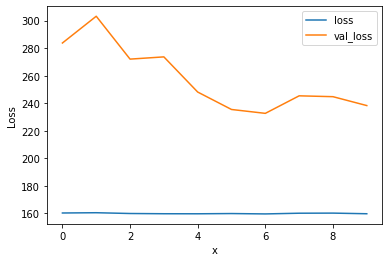

In [79]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, monitor="val_loss"),
]
model = Model(inputs=inlayer, outputs=x)
model.compile(loss="mse", optimizer="adam")
model.summary()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, callbacks=my_callbacks)
plot(history)

LR scheduling allow you to make LR smaller on further epochs to make weights tuning more and more accurate.
Create callback for LR scheduling. Create a function which takes 'epoch' and 'lr' parameter and returns smaller 'lr'.
For example it divides 'lr' by 2.
Train NN with callback
Print 'lr' value (model.optimizer.lr.numpy()) before training and after it
HINT tf.keras.callbacks.LearningRateScheduler

In [ ]:
my_callbacks = [
    tf.keras.callbacks.LearningRateScheduler(),
]
model = Model(inputs=inlayer, outputs=x)
model.compile(loss="mse", optimizer="adam")
model.summary()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, callbacks=my_callbacks)
plot(history)